In [13]:
# Import Libraries
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

import seaborn as sns

import plotly
import plotly.express as px
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot

import cufflinks as cf

In [8]:
pyo.init_notebook_mode(connected=True)
cf.go_offline()

In [14]:
# Reading CSV File
df = pd.read_csv('heart.csv')

In [15]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [16]:
df.shape # Shape of df

(303, 14)

In [18]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]



for i in range(len(info)):
    print(df.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


In [19]:
df['target']

0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      1
9      1
10     1
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     1
19     1
20     1
21     1
22     1
23     1
24     1
25     1
26     1
27     1
28     1
29     1
      ..
273    0
274    0
275    0
276    0
277    0
278    0
279    0
280    0
281    0
282    0
283    0
284    0
285    0
286    0
287    0
288    0
289    0
290    0
291    0
292    0
293    0
294    0
295    0
296    0
297    0
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [21]:
df.groupby('target').size()

target
0    138
1    165
dtype: int64

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [23]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Visualization

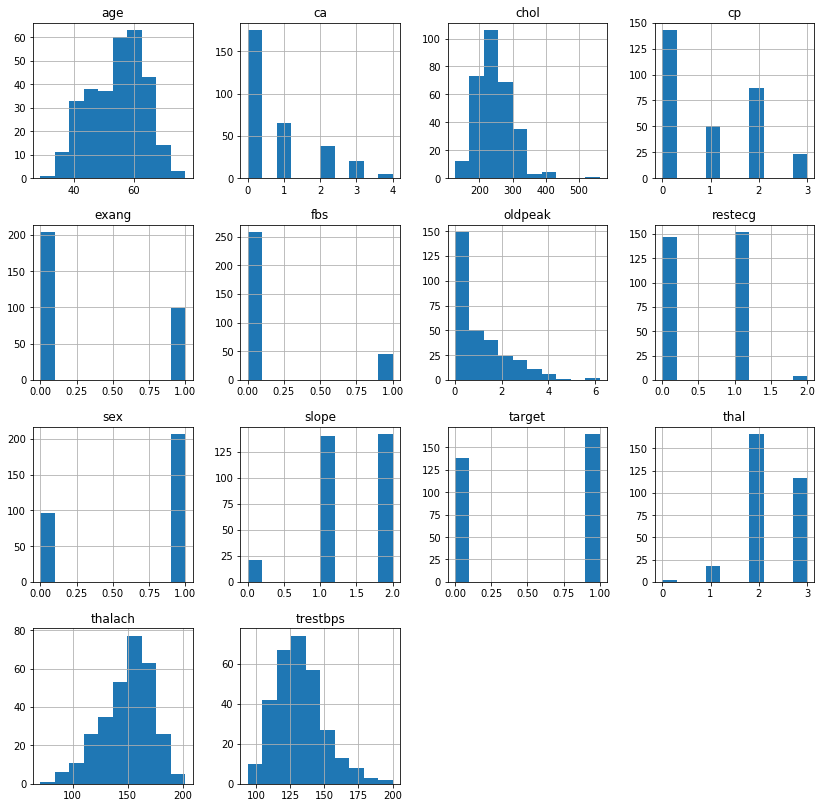

In [25]:
df.hist(figsize=(14,14))
plt.show()

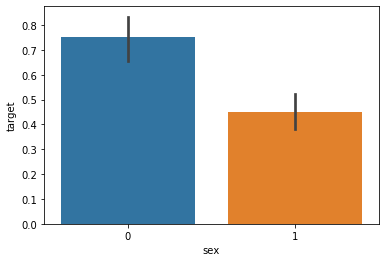

In [38]:
sns.barplot(x='sex',y='target',data=df)

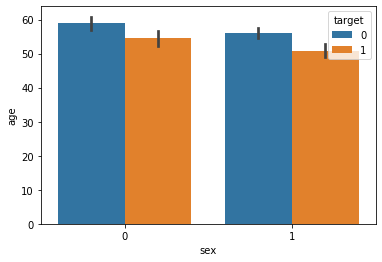

In [39]:
sns.barplot(x='sex',y='age',data=df,hue='target')

In [40]:
px.bar(data_frame=df,x='sex',y='target')

In [41]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [43]:
numeric_columns = ['trestbps','chol','age','oldpeak','thalach']

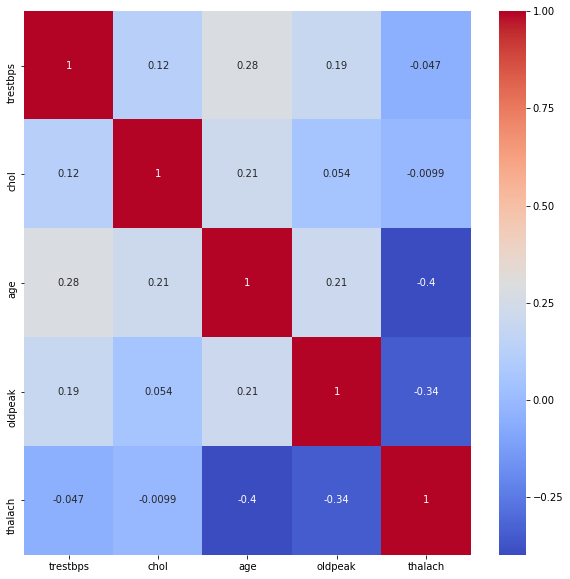

In [52]:
plt.figure(figsize=(10,10))
sns.heatmap(df[numeric_columns].corr(),annot=True,cmap='coolwarm')
plt.show()

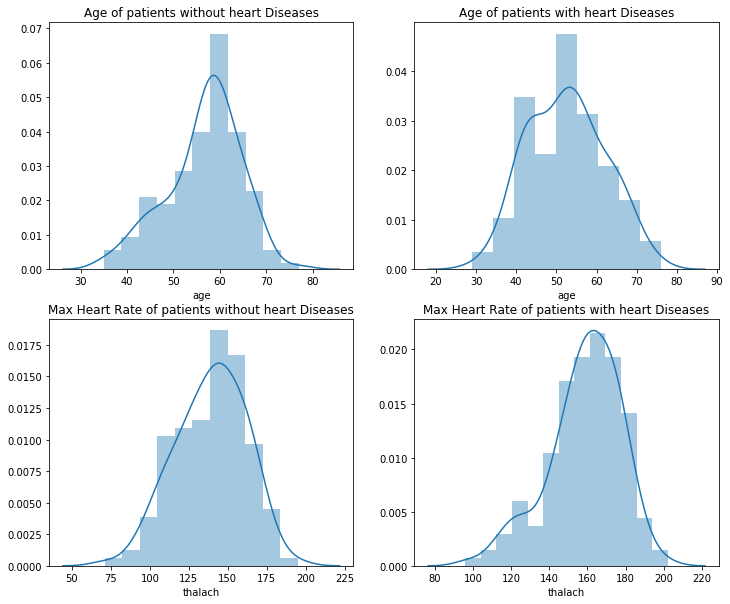

In [64]:
# create four displots
plt.figure(figsize=(12,10))
plt.subplot(221)
sns.distplot(df[df['target']==0]['age'])
plt.title('Age of patients without heart Diseases')

plt.subplot(222)
sns.distplot(df[df['target']==1]['age'])
plt.title('Age of patients with heart Diseases')

plt.subplot(223)
sns.distplot(df[df['target']==0]['thalach'])
plt.title('Max Heart Rate of patients without heart Diseases')

plt.subplot(224 )
sns.distplot(df[df['target']==1]['thalach'])
plt.title('Max Heart Rate of patients with heart Diseases')

plt.show()

# Data Preporcessing

In [221]:
X = df.drop('target',axis=1)

In [222]:
y = df['target']

In [223]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [224]:
y.head().to_frame()

,target
0,1
1,1
2,1
3,1
4,1


In [225]:
X.shape

(303, 13)

In [226]:
y.shape

(303,)

In [227]:
X.size # will use 70% data for training and 30% for testing

3939

In [228]:
X.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [229]:
X.drop('fbs',axis=1,inplace=True)

In [230]:
from sklearn.model_selection import train_test_split

In [231]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=10)

In [232]:
X_train.shape

(212, 12)

In [233]:
X_test.shape

(91, 12)

In [234]:
# Decision Tree Classifier

In [235]:
from sklearn.tree import DecisionTreeClassifier

In [236]:
dtree = DecisionTreeClassifier()

In [237]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [238]:
dtree_prediction = dtree.predict(X_test)

In [239]:
# classification_report, confusion_matrix, accuracy_score

In [240]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [241]:
print(f'Accuracy using Decision Tree Classifier : {accuracy_score(y_test,dtree_prediction)*100}%')

Accuracy using Decision Tree Classifier : 72.52747252747253%


In [242]:
print(f'Confusion Metrix using Decision Tree Classifier\n')
print(confusion_matrix(y_test,dtree_prediction))

Confusion Metrix using Decision Tree Classifier

[[32 18]
 [ 7 34]]


In [243]:
print(f'Classification Report using Decision Tree Classifier\n')
print(classification_report(y_test,dtree_prediction))

Classification Report using Decision Tree Classifier

              precision    recall  f1-score   support

           0       0.82      0.64      0.72        50
           1       0.65      0.83      0.73        41

    accuracy                           0.73        91
   macro avg       0.74      0.73      0.73        91
weighted avg       0.75      0.73      0.72        91



In [244]:
# Finds most important features which is very useful to make prediction
dtree.feature_importances_

array([0.05482313, 0.0283698 , 0.32392476, 0.0867137 , 0.11243267,
       0.        , 0.07573333, 0.04724994, 0.06034607, 0.07300416,
       0.12918284, 0.0082196 ])

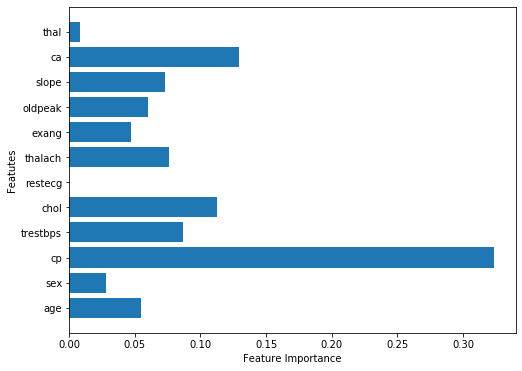

In [245]:
def plot_feature_importance(model):
    plt.figure(figsize=(8,6))
    n_features = 12
    plt.barh(range(n_features),dtree.feature_importances_,align='center')
    plt.xlabel('Feature Importance')
    plt.ylabel('Featutes')
    plt.yticks(np.arange(n_features),X)
    plt.ylim(-1,n_features)
    
plot_feature_importance(dtree)

In [246]:
# KNN Algorithm

In [267]:
from sklearn.neighbors import KNeighborsClassifier

In [295]:
knn = KNeighborsClassifier()

In [296]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [297]:
knn_prediction = knn.predict(X_test)

In [298]:
print(f'Accuracy using K Nearest Classifier : {accuracy_score(y_test,knn_prediction)*100}%')

Accuracy using K Nearest Classifier : 63.73626373626373%


In [299]:
# Elbow Method to find minimum error rate 

error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

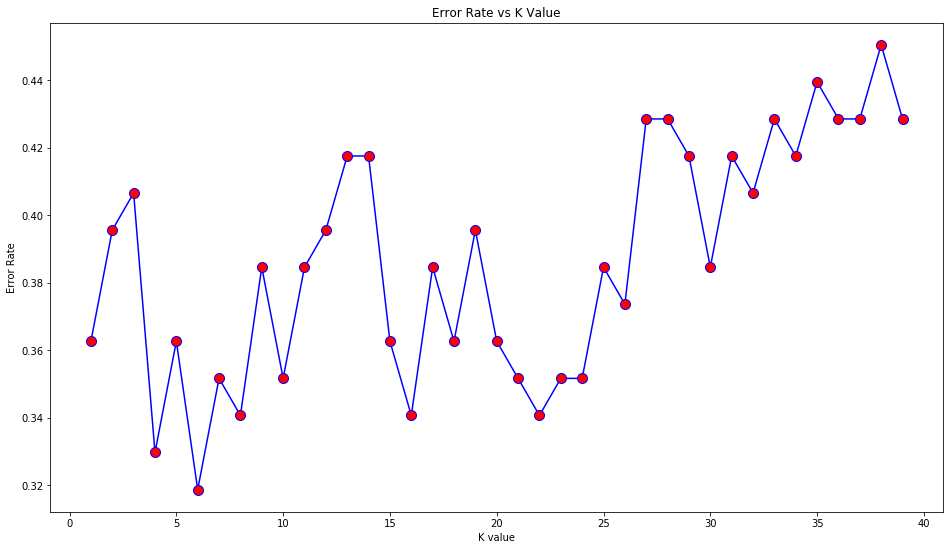

In [300]:
plt.figure(figsize=(16,9))

plt.plot(range(1,40), error_rate, color='b', markersize=10, marker='o', markerfacecolor='r')
plt.title('Error Rate vs K Value')
plt.xlabel('K value')
plt.ylabel('Error Rate')

In [365]:
# Using Standard Scaler

In [366]:
from sklearn.preprocessing import StandardScaler

In [367]:
scaler = StandardScaler()

In [368]:
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [369]:
X_scaler = scaler.transform(X)

In [370]:
X_scaler

array([[ 0.9521966 ,  0.68100522,  1.97312292, ..., -2.27457861,
        -0.71442887, -2.14887271],
       [-1.91531289,  0.68100522,  1.00257707, ..., -2.27457861,
        -0.71442887, -0.51292188],
       [-1.47415758, -1.46841752,  0.03203122, ...,  0.97635214,
        -0.71442887, -0.51292188],
       ...,
       [ 1.50364073,  0.68100522, -0.93851463, ..., -0.64911323,
         1.24459328,  1.12302895],
       [ 0.29046364,  0.68100522, -0.93851463, ..., -0.64911323,
         0.26508221,  1.12302895],
       [ 0.29046364, -1.46841752,  0.03203122, ..., -0.64911323,
         0.26508221, -0.51292188]])

In [371]:
X_scaler.shape

(303, 12)

In [383]:
X_train_scaler, X_test_scaler, y_train_scaler, y_test_scaler = train_test_split(X_scaler, y, test_size=0.3, random_state=10)

In [384]:
# Again training KNN using minimum error rate

In [385]:
knn = KNeighborsClassifier()

In [386]:
knn.fit(X_train_scaler,y_train_scaler)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [387]:
knn_prediction_scaler = knn.predict(X_test_scaler)

In [388]:
print(f'Accuracy using K Nearest Classifier using minimum error rate: {accuracy_score(y_test_scaler,knn_prediction_scaler)*100}')

Accuracy using K Nearest Classifier using minimum error rate: 79.12087912087912
